<a href="https://colab.research.google.com/github/suhani1503/Churn-modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install -y libsm6 libxext6 libxrender-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.4-0ubuntu1).
libxrender-dev is already the newest version (1:0.9.10-1).
libxrender-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install tensorflow==2.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import os

# List files in the current directory
files = os.listdir()
print(files)


['.config', 'drive', 'Churn_Modelling.csv', 'sample_data']


In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 10s 5ms/step - loss: 0.9603 - accuracy: 0.7615 - val_loss: 0.5741 - val_accuracy: 0.7823
Epoch 2/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4951 - accuracy: 0.7953 - val_loss: 0.4832 - val_accuracy: 0.8005
Epoch 3/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4571 - accuracy: 0.8041 - val_loss: 0.4798 - val_accuracy: 0.8065
Epoch 4/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4417 - accuracy: 0.8061 - val_loss: 0.4485 - val_accuracy: 0.8114
Epoch 5/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4310 - accuracy: 0.8151 - val_loss: 0.4424 - val_accuracy: 0.8152
Epoch 6/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4360 - accuracy: 0.8177 - val_loss: 0.4276 - val_accuracy: 0.8129
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4129 - accuracy: 0.8181 - val_loss: 0.4195 - val_accuracy: 0.8164
Epoch

In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


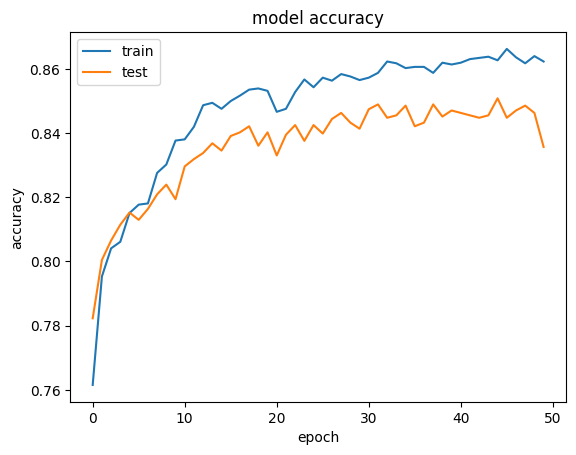

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

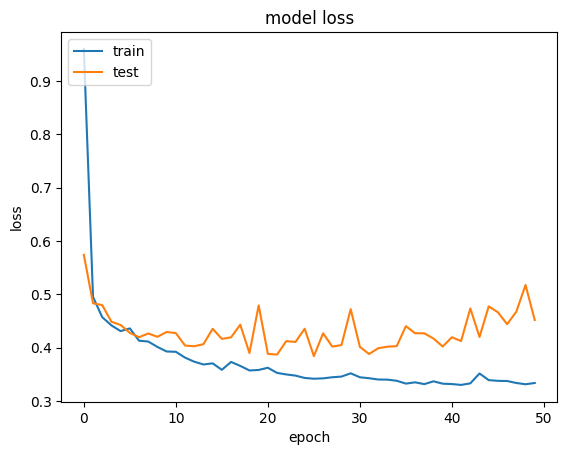

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1496,   99],
       [ 208,  197]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8465